Este notebook foi desenvolvido no curso 'Fundamentos de Linguagem Python Para Análise de Dados e Data Science' da Data Science Academy (DSA). Algumas alterações, comentários e complementos acerca do tema foram adicionados por mim.

Robô Trading com Inteligência Artificial em Linguagem Python

Problema de Negócio:
* Construir um robô (modelo em Linguagem Python) baseado em Inteligência Artificial que aprenda a operar na bolsa de valores a partir de experimentos de compra e venda de ações. Dado um saldo inicial o modelo deve apresentar o resultado (lucro) a ser obtido depois de ações de compra e venda.

**O Que é Aprendizado Por Reforço (Reinforcement Learning)?**

"O  Aprendizado  por  Reforço  (Reinforcement  Learning)  é  uma  área  de  aprendizado  de máquina  que  foca  no  treinamento  de  agentes  para  tomar  decisões  ótimas  em  um  ambiente, através da interação com esse ambiente e da experimentação. O objetivo do agente é aprender uma  política  que  mapeia  estados  do  ambiente  para  ações  que  maximizam  a  recompensa acumulada  ao  longo  do  tempo.  

Recomendamos  o  capítulo  62  do  Deep  Learning  para  uma definição completa. Aqui está o link para você:(https://www.deeplearningbook.com.br/o-que-e-aprendizagem-por-reforco/)

No  Aprendizado  por  Reforço,  o  agente  recebe  uma  recompensa  (positiva  ou  negativa) após  executar  uma  ação  em  um  estado  específico.  Através  dessas  recompensas,  o  agente aprende a associar ações com estados do ambiente e assim consegue tomar decisões melhores ao longo do tempo.

O   processo   de   aprendizado   ocorre   iterativamente,   em   episódios,   com   o   agente explorando oambiente. A exploração envolve a escolha de ações aleatórias para descobrir novos estados e recompensas, sendo que as ações devem ser escolhidas de forma que maximizem a recompensa com base no conhecimento atual.

Algoritmos  mais  comuns  de Aprendizado  por  Reforço  incluem:Q-Learning,  Deep  Q-Networks  (DQN),  Policy  Gradients,  Actor-Critic  e  Proximal  Policy  Optimization  (PPO),  entre outros. Esses algoritmos têm sido aplicados com sucesso em uma ampla variedade de problemas, incluindo jogos, robótica, otimização de sistemas e negociação de ações em bolsa de valores.

Neste capítulo usaremos o Q-Learning."


**Algoritmo Q-Learning**

O  Q-Learning  é  um  algoritmo  de  aprendizado  por  reforço  baseado  em  valor,  que  visa aprender  uma  função  de  valor-ação,  chamada  de  função  Q,  para  estimar  o  valor  esperado  de executar uma ação em um estado específico e seguir uma política ótima a partir daí. Afunção Q é representada como Q(s, a), onde s é o estado e a é a ação. O objetivo do Q-Learning é aprender a política ótima r(s) que maximiza a recompensa acumulada ao longo do tempo.

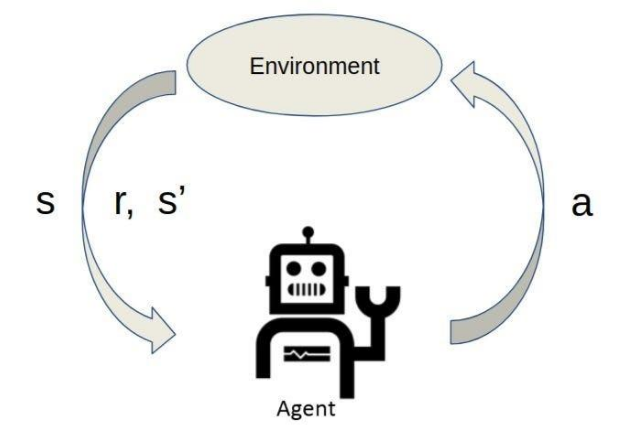

'ENVIRONMENT' = AMBIENTE

'AGENT' = AGENTE

O  algoritmo  Q-Learning  segue  um  processo  iterativo  e  pode  ser  descrito  nos  seguintes passos:

**Inicialização**: Inicialize a tabela Q com zeros (ou valores pequenos) para todos os pares estado-ação (s, a).

**Interação   com   o   ambiente**:   O   agente   interage   com   o   ambiente   repetidamente, executando episódios até que o algoritmo convirja ou um limite de episódios seja atingido.

Em cada episódio:

a. Observe o estado atual (s) do ambiente.

b.  Selecione  uma  ação  (a)  com base na política atual, como a política ε-greedy,  que explora ações aleatórias com probabilidade ε e explora a ação com o maior valor Q(s, a) com probabilidade 1 -ε.

c.  Execute  a  ação  (a)  selecionada  e  observe  a  recompensa  (r)  e  o  próximo  estado  (s') resultante.

d. Atualize a tabela Q usando a regra de atualização do Q-Learning:

**Q(s, a) = Q(s, a) + α * (r + γ * max_a' Q(s', a') -Q(s, a))**

* onde α é a taxa de aprendizado, γ é o fator de desconto e max_a' Q(s', a') é o valor máximo de Q para o próximo estado (s') e todas as ações possíveis (a').

e. Atualize o estado atual: s = s'.

f.  Repita  os  passos  b-e  até  que  o  episódio  termine  (por  exemplo,  o  agente  atinge  um estado terminal ou um limite de passos é atingido).

Ao  final  do  processo  de  aprendizado, o  agente  terá  aprendido  uma  aproximação  da função  Q  ótima,  que  pode  ser  usada  para  tomar  decisões  que  maximizem  a  recompensa acumulada. Para escolher a ação ótima em um estado s, o agente simplesmente seleciona a ação a que possui o maior valor Q(s, a).

OBJETIVO: criar um sistema  de IA que aprenda a  operar na bolsa de valores e seja capaz de, a partir de um saldo inicial, tomar decisões de compra e venda de ações visando obter lucro.

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Notebook:', python_version())

Versão da Linguagem Python Usada Neste Notebook: 3.11.13


https://plotly.com/

In [ ]:
# Instala o pacote
!pip install -q plotly
# gráficos de altíssima qualidade, com interatividade, em tempo real; dashboards, ...

In [ ]:
# Imports
import random
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime

## Carregando e Visualizando os Dados com Candlestick

Os dados são da Apple, dados reais públicos, de 2015 a 2017.

In [ ]:
# Carrega os dados
df = pd.read_csv('dataset.csv')

In [ ]:
df.shape

(506, 11)

In [ ]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


O Candlestick é um tipo de gráfico financeiro utilizado para descrever a movimentação de preços de determinados ativos (ações, criptomoedas, etc.). Em contraste com um gráfico de linha simples do preço de fechamento, ele oferece muito mais informações sobre a dinâmica dos preços - é baseado em dados OHLC, o que significa que contém os preços de abertura, alta, baixa e fechamento (geralmente junto com o volume). Esses valores podem ser mostrados em diferentes frequências de amostragem (minuto, hora, dia, semana, etc.) e são frequentemente usados como base para análises técnicas.

https://plotly.com/python/candlestick-charts/

In [ ]:
# Candlestick
fig = go.Figure(data = [go.Candlestick(x = df['Date'],
                open = df['AAPL.Open'],
                high = df['AAPL.High'],
                low = df['AAPL.Low'],
                close = df['AAPL.Close'])])

fig.show() # mostrar
# import plotly.graph_objects as go
# Figure - função para criar o gráfico

In [ ]:
# Vamos trabalhar com a cotação de fechamento da ação da Apple
precos = df['AAPL.Close'].values

O robô vai aprender a partir dos valores de fechamento da ação.

In [ ]:
type(precos)

numpy.ndarray

## Configuração do Algoritmo Q-Learning

In [ ]:
# Configuração do Q-Learning
print('\nDefinindo os Hiperparâmetros do Q-Learning...')
# 4 parâmetros
num_episodios = 1000 # quantas vezes o algoritmo vai executar o processo de treinamento
# cada episódio representa a sequência completa de ações e estados até o final do ambiente
alfa = 0.1 # taxa de aprendizado q-learning, vai determinar como o algoritmo deve levar em consideração
# novas informações em relação às existentes
gama = 0.99 # fator de desconto do algoritmo, determinando quanto o algoritmo
# valoriza recompensas futuras

# a recompensa é uma variável python!
# recompensa: conseguir lucro com a compra e venda de ações!
epsilon = 0.1 # parâmetro usado na política de exploração
# política para navegar no ambiente


Definindo os Hiperparâmetros do Q-Learning...


## Configuração do Ambiente de Negociação

In [ ]:
# Configuração do ambiente de negociação
print('\nConfigurando o Ambiente de Negociação...')
acoes = ['comprar', 'vender', 'manter'] # lista com as ações possíveis
saldo_inicial = 1000 # reais, dólares,...
num_acoes_inicial = 0


Configurando o Ambiente de Negociação...


## Função Para Executar as Ações (Passos) do Robô Trading

In [ ]:
# Função para executar uma ação e retornar a recompensa e o próximo estado
def executar_acao(estado, acao, saldo, num_acoes, preco):

    # Ação de comprar
    if acao == 0:
        if saldo >= preco: # ver se tem dinheiro
            num_acoes += 1
            saldo -= preco # saldo diminui

    # Ação de vender
    elif acao == 1:
        if num_acoes > 0: # para vender
            num_acoes -= 1
            saldo += preco

    # Define o lucro
    lucro = saldo + num_acoes * preco - saldo_inicial

    return (saldo, num_acoes, lucro)

## Treinamento do Robô

In [ ]:
# Inicializar a tabela Q
print('\nInicializando a Tabela Q...')
q_tabela = np.zeros((len(precos), len(acoes))) # criando uma matriz preenchida por 0 com as dimensões e comprimento
# dos preços e das ações


Inicializando a Tabela Q...


In [ ]:
# Treinamento
print('\nInicializando o Treinamento...')
for _ in range(num_episodios):

    # Define o saldo
    saldo = saldo_inicial # 1000

    # Define o número de ações
    num_acoes = num_acoes_inicial # 0

    # Loop
    for i, preco in enumerate(precos[:-1]):
# enumerate - retorna o índice e o valor
# -1- tudo de trás para frente
        estado = i # índice pelo enumerate

        # Escolher a ação usando a política epsilon-greedy
        if np.random.random() < epsilon:
          # np.random.random() -- define um valor randômico
          # epsilon -- hiperparâmetro
            acao = random.choice(range(len(acoes))) # escolher aleatoriamente
        else:
            acao = np.argmax(q_tabela[estado])

        # Executar a ação e obter a recompensa e o próximo estado
        saldo, num_acoes, lucro = executar_acao(estado, acao, saldo, num_acoes, preco)
        prox_estado = i + 1

        # Atualizar a tabela Q
        q_tabela[estado][acao] += alfa * (lucro + gama * np.max(q_tabela[prox_estado]) - q_tabela[estado][acao])

print('\nTreinamento Concluído...')


Inicializando o Treinamento...

Treinamento Concluído...


## Executando o Robô Trading e Prevendo o Lucro de Operações na Bolsa de Valores

In [ ]:
# Valores iniciais para testar o agente
saldo = saldo_inicial
num_acoes = num_acoes_inicial

In [ ]:
print('\nExecutando o Agente...')
for i, preco in enumerate(precos[:-1]):
    estado = i
    acao = np.argmax(q_tabela[estado]) # q_tabela -- onde está o aprendizado do agente
    saldo, num_acoes, _ = executar_acao(estado, acao, saldo, num_acoes, preco)
# _ -- a função retorna 3 valores, só queremos os 2 primeiros
print('\nExecução Concluída...')


Executando o Agente...

Execução Concluída...


In [ ]:
num_acoes

7

In [ ]:
precos[-1]

np.float64(135.350006)

In [ ]:
# Vendendo todas as ações no último preço
saldo += num_acoes * precos[-1]
lucro = saldo - saldo_inicial
lucro_final = round(lucro,2)

In [ ]:
print(f"\nComeçamos a Negociação com Saldo Inicial de 1000 e Tivemos Lucro de: {lucro_final}")


Começamos a Negociação com Saldo Inicial de 1000 e Tivemos Lucro de: 66.38


In [ ]:
print("\nObrigado Por Usar o Robô Trading do Curso Gratuito da DSA.\n")


Obrigado Por Usar o Robô Trading do Curso Gratuito da DSA.

